# Creating Multiple Datasets to Increase Fake Injection

This notebook performs an analysis of contrast in PSF-Subtracted images. This process is done in a few simple steps:   

1) Fake planets are injected into the given dataset.  

2) pyKLIP is used to subtract the PSF of the star in the data.  

3) The fake planets are retrieved, and their post-klip flux values are measured.  

4) Contrast curves are created.

In [1]:
import os
import astropy.io.fits as fits
import numpy as np
import scipy
import scipy.ndimage as ndi
import matplotlib.pylab as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pyklip.klip
import pyklip.instruments.Instrument as Instrument
import pyklip.parallelized as parallelized
import pyklip.rdi as rdi
import pyklip.fakes as fakes
import glob
from astropy.table import Table
from astropy.table import join
from astropy.table import vstack
import pdb

### Loading the datasets

In [2]:
datasets = []
for dataset in range(10):
    
    #Import the dataset to be used
    filtername = "f300m"

    # read in roll 1
    with fits.open("old_simulated_data/NIRCam_target_Roll1_{0}.fits".format(filtername)) as hdulist:
        roll1_cube = hdulist[0].data

    # read in roll 2
    with fits.open("old_simulated_data/NIRCam_target_Roll2_{0}.fits".format(filtername)) as hdulist:
        roll2_cube = hdulist[0].data  

    # combine the two rows
    full_seq = np.concatenate([roll1_cube, roll2_cube], axis=0)

    # two rolls are offset 10 degrees
    pas = np.append([0 for _ in range(roll1_cube.shape[0])], [10 for _ in range(roll2_cube.shape[0])])

    # for each image, the (x,y) center where the star is is just the center of the image
    centers = np.array([np.array(frame.shape)//2. for frame in full_seq])

    # give it some names, just in case we want to refer to them
    filenames = np.append(["roll1_{0}".format(i) for i in range(roll1_cube.shape[0])],
                          ["roll2_{0}".format(i) for i in range(roll1_cube.shape[0])])

    #Define dataset
    dataset = Instrument.GenericData(full_seq, centers, IWA=4, parangs=pas, filenames=filenames)
    dataset.flipx = False
    datasets.append(dataset)

### KLIP - retrieve fluxes

In [31]:
#put code into txt file. astropy.tables - can turn code into csv

In [4]:

# read in unocculted PSF
with fits.open("old_simulated_data/NIRCam_unocculted_{0}.fits".format(filtername)) as hdulist:
    psf_cube = hdulist[0].data 
    psf_head = hdulist[0].header
   #print(psf_cube.shape)   

# collapse reference psf in time
psf_frame = np.nanmean(psf_cube, axis=0)

# find the centroid
bestfit = fakes.gaussfit2d(psf_frame, 71, 30, searchrad=3, guessfwhm=2, guesspeak=1, refinefit=True)

psf_xcen, psf_ycen = bestfit[2:4]
#print(psf_xcen, psf_ycen)

# recenter PSF to that location
x, y = np.meshgrid(np.arange(-20,20.1,1), np.arange(-20,20.1,1))
x += psf_xcen
y += psf_ycen

psf_stamp = scipy.ndimage.map_coordinates(psf_frame, [y,x])


Begin align and scale images for each wavelength
Wavelength 1.0 with index 0 has finished align and scale. Queuing for KLIP
Total number of tasks for KLIP processing is 36
27.78% done (9/36 completed)
55.56% done (19/36 completed)
83.33% done (29/36 completed)
Closing threadpool
Derotating Images...
Writing Images to directory /Users/jeaadams/JWST_PIPE/notebooks/contrastcurves


/Users/jeaadams/Follete-group/Follette-group/wrapperUpdate/pyklip/pyklip/parallelized.py:1561: RuntimeWarning: Mean of empty slice
  KLmode_cube = np.nanmean(pixel_weights * dataset.output, axis=(1,2))


Begin align and scale images for each wavelength
Wavelength 1.0 with index 0 has finished align and scale. Queuing for KLIP
Total number of tasks for KLIP processing is 36
27.78% done (9/36 completed)
55.56% done (19/36 completed)
83.33% done (29/36 completed)
Closing threadpool
Derotating Images...
Writing Images to directory /Users/jeaadams/JWST_PIPE/notebooks/contrastcurves


/Users/jeaadams/Follete-group/Follette-group/wrapperUpdate/pyklip/pyklip/parallelized.py:1561: RuntimeWarning: Mean of empty slice
  KLmode_cube = np.nanmean(pixel_weights * dataset.output, axis=(1,2))


Begin align and scale images for each wavelength
Wavelength 1.0 with index 0 has finished align and scale. Queuing for KLIP
Total number of tasks for KLIP processing is 36
27.78% done (9/36 completed)
55.56% done (19/36 completed)
83.33% done (29/36 completed)
Closing threadpool
Derotating Images...
Writing Images to directory /Users/jeaadams/JWST_PIPE/notebooks/contrastcurves


/Users/jeaadams/Follete-group/Follette-group/wrapperUpdate/pyklip/pyklip/parallelized.py:1561: RuntimeWarning: Mean of empty slice
  KLmode_cube = np.nanmean(pixel_weights * dataset.output, axis=(1,2))


Begin align and scale images for each wavelength
Wavelength 1.0 with index 0 has finished align and scale. Queuing for KLIP
Total number of tasks for KLIP processing is 36
27.78% done (9/36 completed)
55.56% done (19/36 completed)
83.33% done (29/36 completed)
Closing threadpool
Derotating Images...
Writing Images to directory /Users/jeaadams/JWST_PIPE/notebooks/contrastcurves


/Users/jeaadams/Follete-group/Follette-group/wrapperUpdate/pyklip/pyklip/parallelized.py:1561: RuntimeWarning: Mean of empty slice
  KLmode_cube = np.nanmean(pixel_weights * dataset.output, axis=(1,2))


Begin align and scale images for each wavelength
Wavelength 1.0 with index 0 has finished align and scale. Queuing for KLIP
Total number of tasks for KLIP processing is 36
27.78% done (9/36 completed)
55.56% done (19/36 completed)
83.33% done (29/36 completed)
Closing threadpool
Derotating Images...
Writing Images to directory /Users/jeaadams/JWST_PIPE/notebooks/contrastcurves


/Users/jeaadams/Follete-group/Follette-group/wrapperUpdate/pyklip/pyklip/parallelized.py:1561: RuntimeWarning: Mean of empty slice
  KLmode_cube = np.nanmean(pixel_weights * dataset.output, axis=(1,2))


Begin align and scale images for each wavelength
Wavelength 1.0 with index 0 has finished align and scale. Queuing for KLIP
Total number of tasks for KLIP processing is 36
27.78% done (9/36 completed)
55.56% done (19/36 completed)
83.33% done (29/36 completed)
Closing threadpool
Derotating Images...
Writing Images to directory /Users/jeaadams/JWST_PIPE/notebooks/contrastcurves


/Users/jeaadams/Follete-group/Follette-group/wrapperUpdate/pyklip/pyklip/parallelized.py:1561: RuntimeWarning: Mean of empty slice
  KLmode_cube = np.nanmean(pixel_weights * dataset.output, axis=(1,2))


Begin align and scale images for each wavelength
Wavelength 1.0 with index 0 has finished align and scale. Queuing for KLIP
Total number of tasks for KLIP processing is 36
27.78% done (9/36 completed)
55.56% done (19/36 completed)
83.33% done (29/36 completed)
Closing threadpool
Derotating Images...
Writing Images to directory /Users/jeaadams/JWST_PIPE/notebooks/contrastcurves


/Users/jeaadams/Follete-group/Follette-group/wrapperUpdate/pyklip/pyklip/parallelized.py:1561: RuntimeWarning: Mean of empty slice
  KLmode_cube = np.nanmean(pixel_weights * dataset.output, axis=(1,2))


Begin align and scale images for each wavelength
Wavelength 1.0 with index 0 has finished align and scale. Queuing for KLIP
Total number of tasks for KLIP processing is 36
27.78% done (9/36 completed)
55.56% done (19/36 completed)
83.33% done (29/36 completed)
Closing threadpool
Derotating Images...
Writing Images to directory /Users/jeaadams/JWST_PIPE/notebooks/contrastcurves


/Users/jeaadams/Follete-group/Follette-group/wrapperUpdate/pyklip/pyklip/parallelized.py:1561: RuntimeWarning: Mean of empty slice
  KLmode_cube = np.nanmean(pixel_weights * dataset.output, axis=(1,2))


Begin align and scale images for each wavelength
Wavelength 1.0 with index 0 has finished align and scale. Queuing for KLIP
Total number of tasks for KLIP processing is 36
27.78% done (9/36 completed)
55.56% done (19/36 completed)
83.33% done (29/36 completed)
Closing threadpool
Derotating Images...
Writing Images to directory /Users/jeaadams/JWST_PIPE/notebooks/contrastcurves


/Users/jeaadams/Follete-group/Follette-group/wrapperUpdate/pyklip/pyklip/parallelized.py:1561: RuntimeWarning: Mean of empty slice
  KLmode_cube = np.nanmean(pixel_weights * dataset.output, axis=(1,2))
/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Begin align and scale images for each wavelength
Wavelength 1.0 with index 0 has finished align and scale. Queuing for KLIP
Total number of tasks for KLIP processing is 36
27.78% done (9/36 completed)
55.56% done (19/36 completed)
83.33% done (29/36 completed)
Closing threadpool
Derotating Images...
Writing Images to directory /Users/jeaadams/JWST_PIPE/notebooks/contrastcurves


/Users/jeaadams/Follete-group/Follette-group/wrapperUpdate/pyklip/pyklip/parallelized.py:1561: RuntimeWarning: Mean of empty slice
  KLmode_cube = np.nanmean(pixel_weights * dataset.output, axis=(1,2))


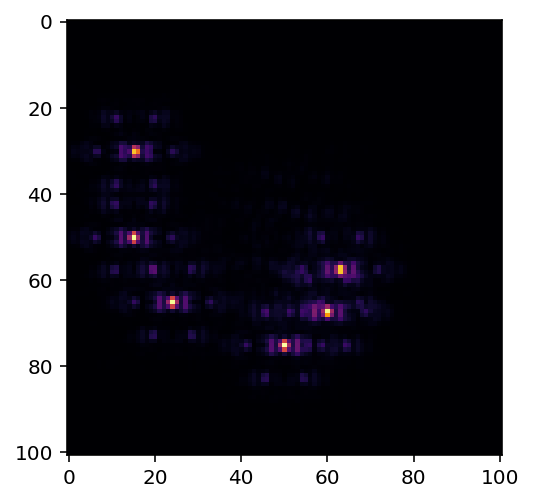

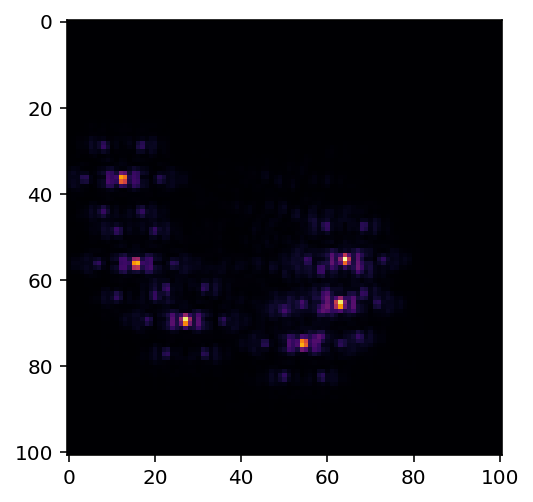

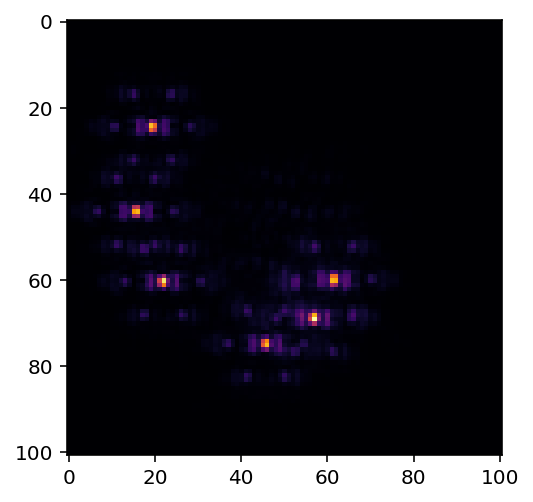

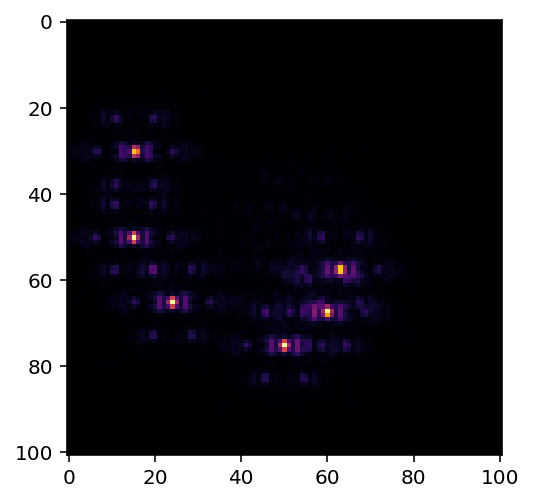

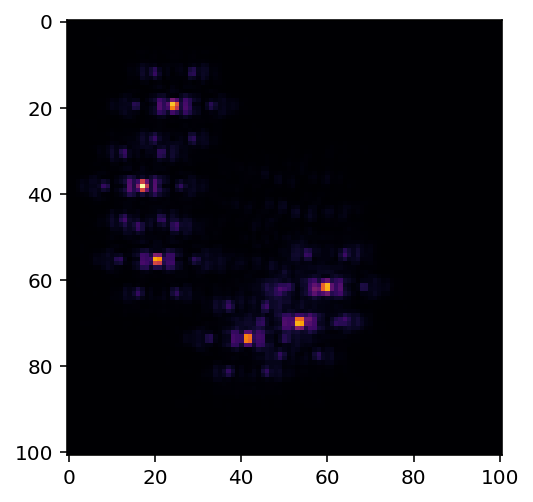

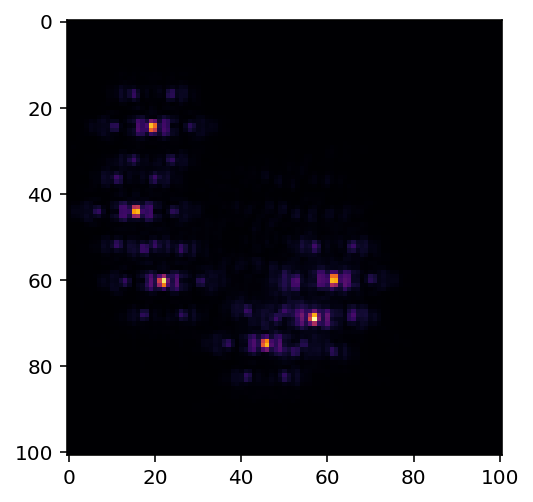

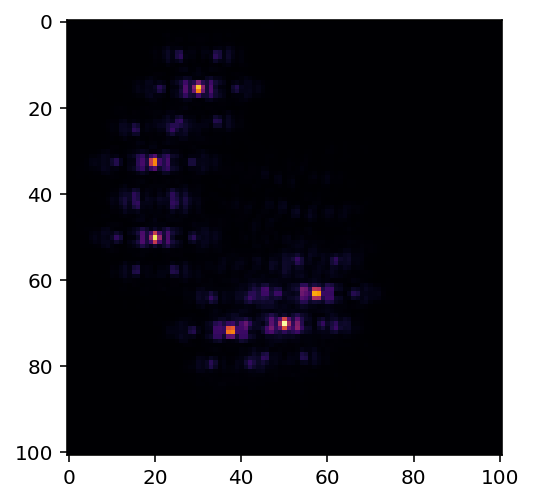

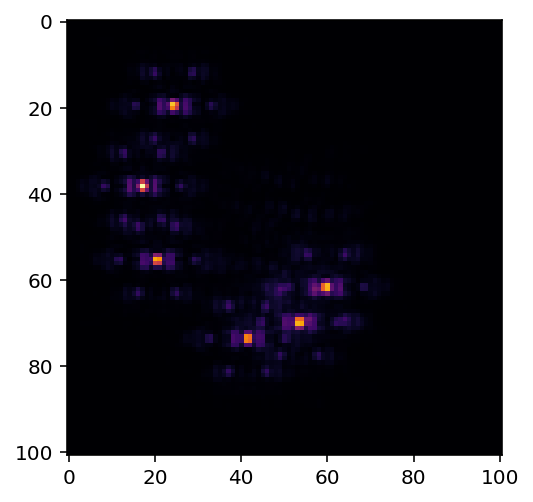

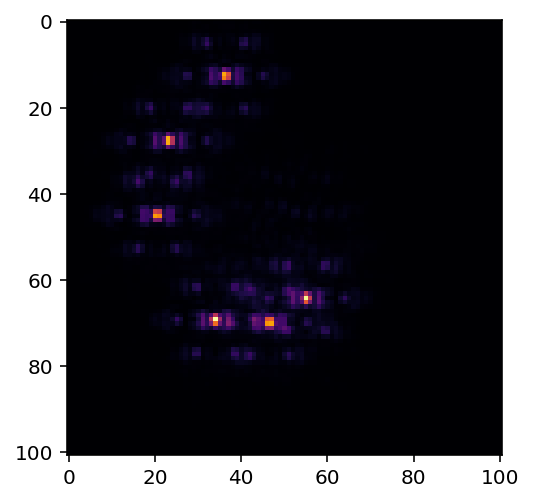

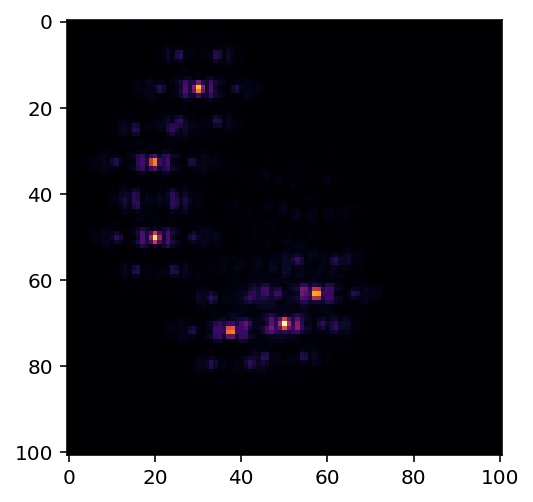

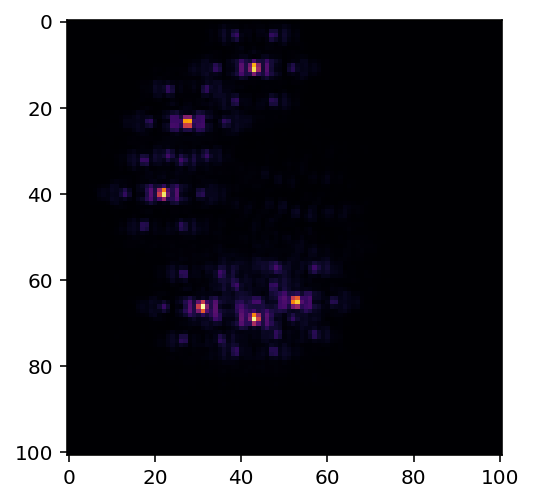

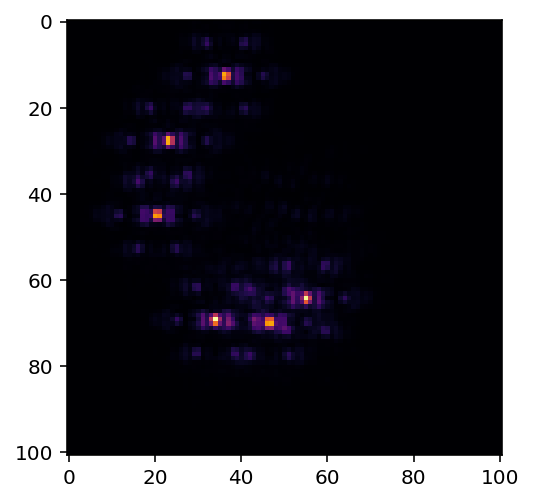

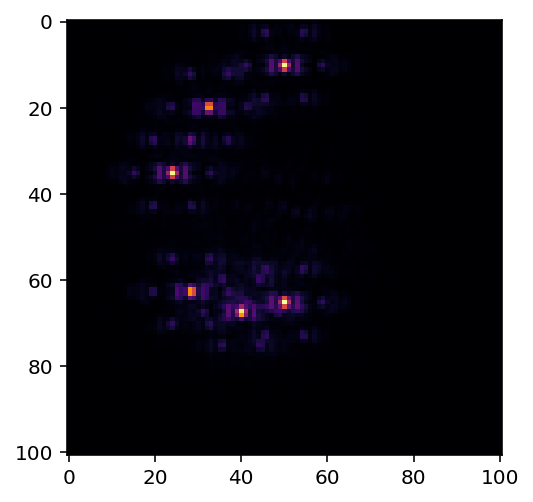

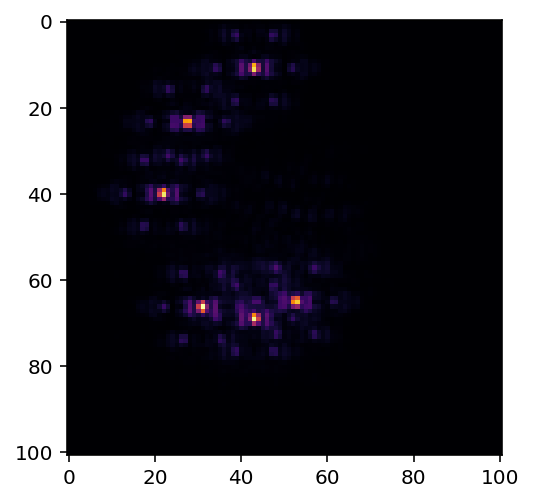

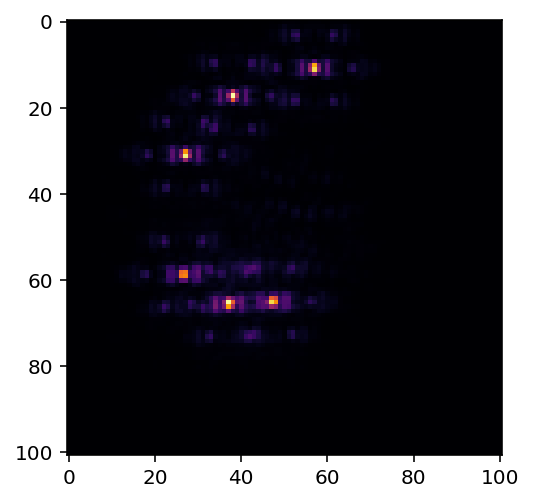

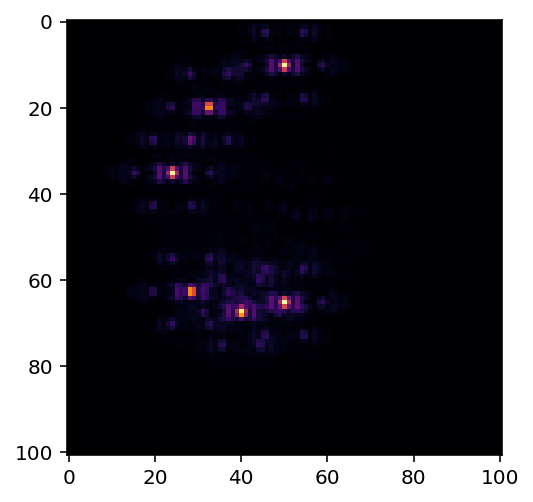

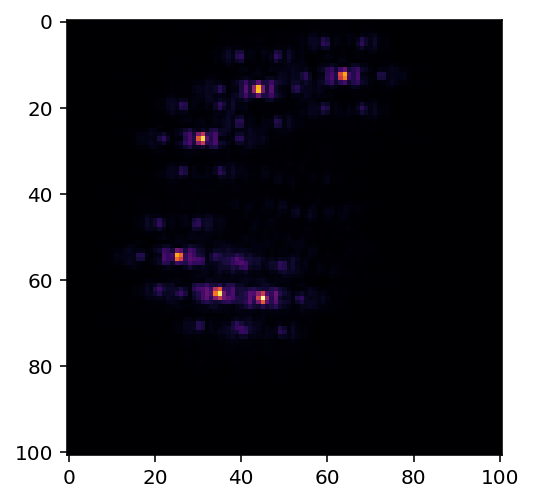

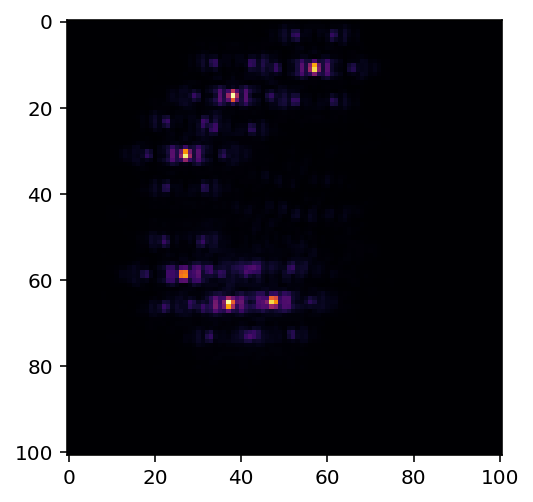

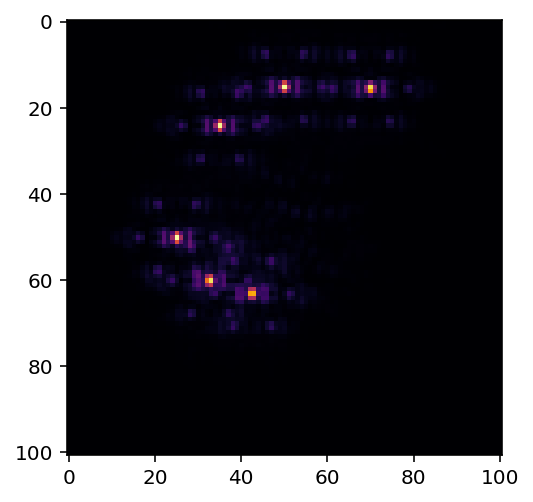

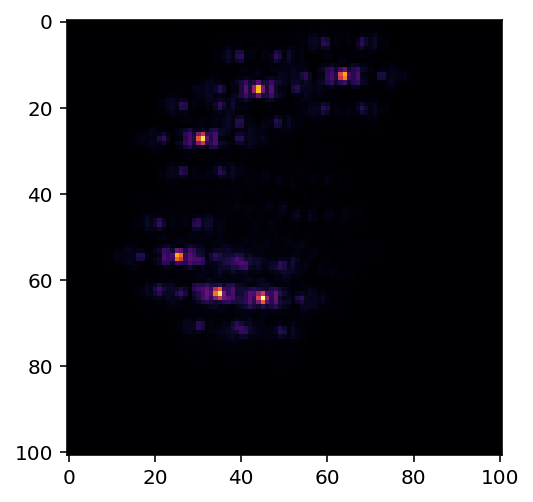

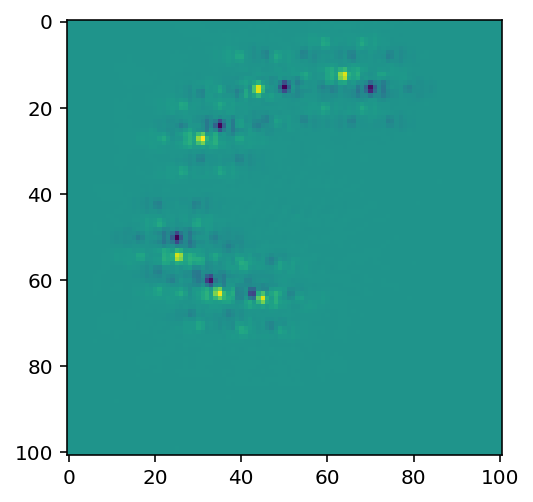

In [5]:
retrievedfluxes_all = []
planet_seps_all = []
retrieved_contrast_all = []
retrieved_contrast_seps_all = []
thetas = [30, 60, 90, 150, 180, 210]
thetas_step_size = 10
for dataset, i in zip(datasets,range(len(datasets))):

    #Specify the desired contrasts of the fake planets' flux
    input_contrasts = [1e-2, 1e-2, 1e-2, 1e-2, 1e-2, 1e-2]
    planet_seps = [15,20,25,30,35,40]
    planet_seps_all.append(planet_seps)
    planet_fwhm = 3.5

    #making more psf stamps
    psf_stamp_input = np.array([psf_stamp for i in range(12)])
    #print(psf_stamp.shape)

    #Defining angle of injected fakes in CCW angle from +x axis to +y axis
    thetas_values = [x+thetas_step_size*i for x in thetas]
    thetas_array = []
    for theta_value in thetas_values:
        these_thetas = np.ones(12)*theta_value
        corrected_thetas = these_thetas - dataset.PAs
        thetas_array.append(corrected_thetas)

    for input_contrast, planet_sep, theta in zip(input_contrasts, planet_seps, thetas_array):
    #Multiply unocculted psf by desired contrast level to simulate planet psf
        planet_fluxes = psf_stamp_input*input_contrast
#         if i > 0:
#             pdb.set_trace()
            
        fakes.inject_planet(frames = dataset.input, 
                            centers=dataset.centers, 
                            inputflux=planet_fluxes, 
                            astr_hdrs=dataset.wcs, 
                            radius=planet_sep,
                            pa = None,
                            thetas = theta)

    #Image with fakes injected before KLIP
    plt.imshow(dataset.input[2], cmap = 'inferno')

    plt.figure()
    plt.imshow(dataset.input[8], cmap = 'inferno')

    plt.figure()
    plt.imshow(dataset.input[8] - dataset.input[2])
    
    #Set output directory
    outputdir = 'contrastcurves'
    fileprefix = 'FAKE_KLIP_ADI_A9K5S4M1' + str(i)
    numbasis = [1,5,10,20,50]


    #Run KLIP on dataset with injected fakes
    parallelized.klip_dataset(dataset, 
                              outputdir=outputdir, 
                              fileprefix=fileprefix, 
                              algo = 'klip', 
                              annuli=9, 
                              subsections=4, 
                              movement=1, 
                              numbasis=numbasis, 
                              mode="ADI")
    

    # replace os.path.join(foldername,filename)
    klipdataset = "contrastcurves/"+ fileprefix + "-KLmodes-all.fits"
    with fits.open(klipdataset) as hdulist:
        outputfile = hdulist[0].data
        outputfile_centers = [hdulist[0].header['PSFCENTX'], hdulist[0].header['PSFCENTY']]

    outputfile_frame = outputfile[2]
    
    thetas_retrieve = [x+thetas_step_size*i for x in thetas]
    retrieved_planet_fluxes = []

    
    #retrieving planet flux
    for input_contrast, planet_sep, theta in zip(input_contrasts, planet_seps, thetas_retrieve):
        

        fake_flux = fakes.retrieve_planet_flux(frames = outputfile_frame, 
                                                centers=outputfile_centers,
                                                astr_hdrs=dataset.wcs[0], 
                                                sep=planet_sep,
                                                pa = None,
                                                thetas = theta,
                                                searchrad = 7)

        retrieved_planet_fluxes.append(fake_flux)

    retrievedfluxes_all.append(retrieved_planet_fluxes)
    
#Make tables of the flux and corresponding separation measuremetns
tables = []
for flux, sep in zip(retrievedfluxes_all, planet_seps_all):
    t = Table([flux,sep], names = ('flux', 'separation'))
    tables.append(t)
    
flux_sep = vstack([x for x in tables])


## Compute throughput

In [7]:
#if i > x continue
#do this at the end when you get the value from the contrast curve
#make fake planets fainter as they go outwards. Start at e-3

In [5]:
#Make sure this is right
#Check units of final image
#Contrast curve says "at x sep i would've recovered at x brightness"
#divide image by what the star's peak would be. - do correction for 
#contrast units
#klip might expect contrast units.
#measure contrast on the image that doesn't have fake planets injects. 
#mask the two real planets as np.nans so they don't bias my noise estimate
#image should look like pure noise. 
#should make conrast lower. 
bestfit[0]

497193.1648309534

In [32]:
#Group by separation values
#hard code input flux somewhere
flux_by_sep = flux_sep.group_by('separation')
#Find the median flux at each unique separation
med_flux_by_sep = flux_by_sep.groups.aggregate(np.median)
flux_unocc = bestfit[0]
throughputs = []
for fluxes in med_flux_by_sep['flux']:
    throughput = np.array(fluxes)/(flux_unocc*(1e-2))
    throughputs.append(throughput)

med_flux_by_sep['throughput'] = throughputs

In [33]:
med_flux_by_sep

flux,separation,throughput
float64,int64,float64
3810.490646471272,15,0.7664004487605629
4060.8633500360083,20,0.8167576783596189
4130.834459867079,25,0.8308309027682571
4318.051460507111,30,0.8684856844271495
4317.454094409317,35,0.8683655367380722
4329.504314560927,40,0.8707891863382647


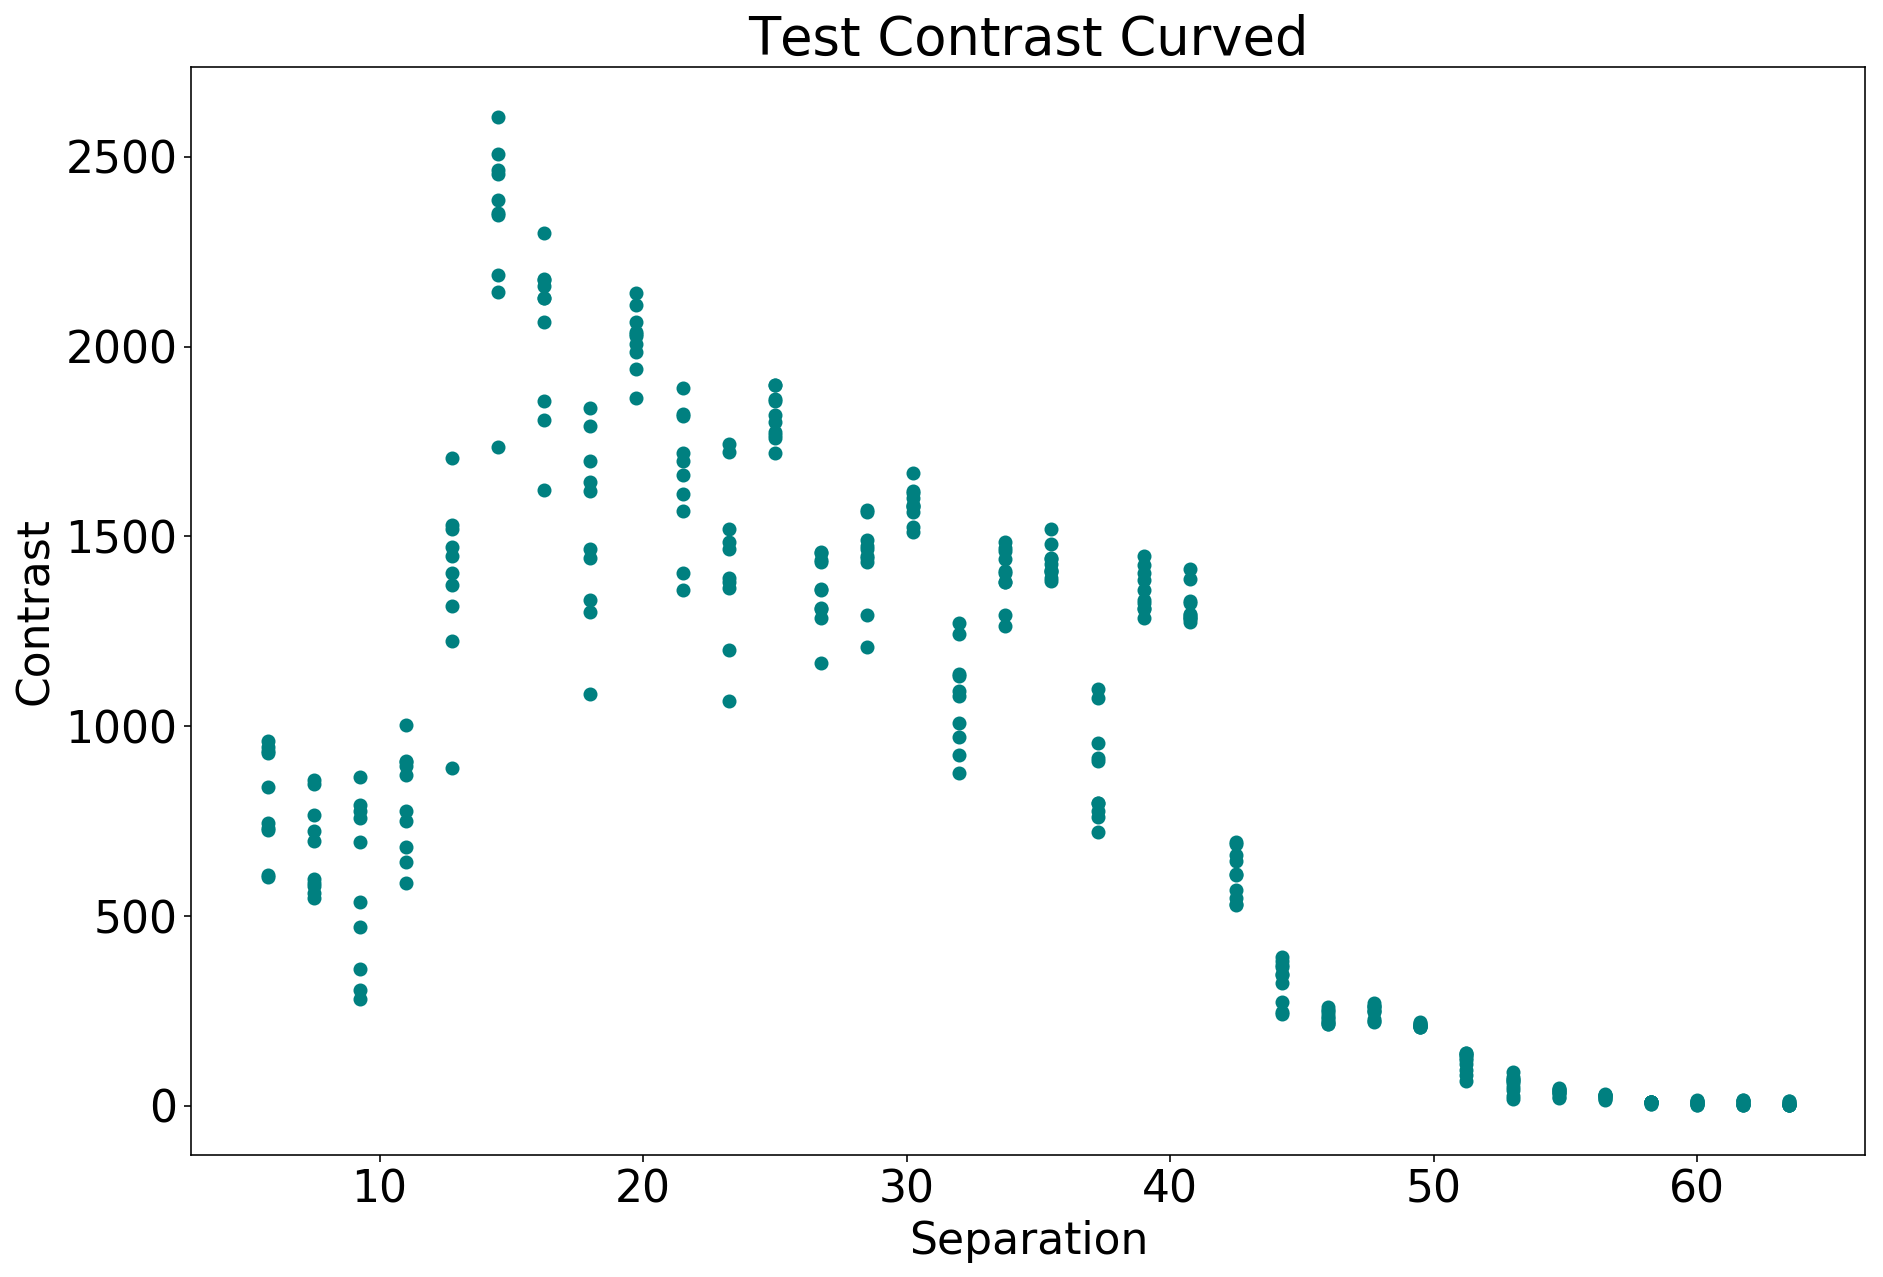

In [22]:
# There is a bug somewhere 
#Divide by unocculted (if you want)
plt.figure(figsize = (15,10))
plt.scatter(retrieved_contrast_seps_all, retrieved_contrast_all, color = "teal")
plt.xlabel("Separation")
plt.ylabel("Contrast")
plt.title("Test Contrast Curved")
plt.rcParams.update({'font.size': 22})
plt.savefig("contrast_all.png", dpic = 500)

In [23]:
#Make tables of the flux and corresponding separation measuremetns
contrast_table = []
for contrast, sep in zip(retrieved_contrast_all, retrieved_contrast_seps_all):
    t = Table([contrast,sep], names = ('contrast', 'separation'))
    contrast_table.append(t)
    
contrast_sep = vstack([x for x in contrast_table])

In [24]:
#Group by separation values
contrast_by_sep = contrast_sep.group_by('separation')
#Find the median flux at each unique separation
#med_contrast_by_sep = contrast_by_sep.groups.aggregate(np.median)
#med_contrast_by_sep
contrast_binned = contrast_by_sep.groups.aggregate(np.mean)

In [25]:
#Make sure throughput units are correct
all_throughputs = []
for fluxes in flux_sep['flux']:
    throughput = np.array(fluxes)/(flux_unocc*1e-2)
    all_throughputs.append(throughput)
flux_sep['throughput'] = all_throughputs

In [28]:
bestfit[0]

497193.1648309534

In [27]:
flux_se

flux,separation,throughput
float64,int64,float64
4214.416074293415,15,0.8476415953397757
3942.4038985440407,20,0.7929320387750031
4287.124446289168,25,0.8622653627482586
4523.492061572906,30,0.909805761933775
4505.0289484617,35,0.9060922931218126
4371.07757472685,40,0.8791507775882285
3738.7958517091643,15,0.7519805412007949
4069.837334906122,20,0.818562607611445
4220.879924146128,25,0.848941663464186


## Make Contrast Curves

In [10]:
OWA = 65 #Setting this to be distance between star and outer edge of image
FWHM = 3.5

#Measuring the contrast in the image
contrast_seps, contrast = pyklip.klip.meas_contrast(dat = outputfile_frame, 
                                                     iwa = dataset.IWA, 
                                                     owa = OWA, 
                                                     resolution = FWHM, 
                                                     center = outputfile_centers,
                                                     low_pass_filter = False)

In [11]:
# platescale =0.065 
# imsz = dataset.input.shape[1] #Setting the image size (101)
# numann = 9
# annspacing = (imsz/2.-dataset.IWA)/numann #Spacing between annuli? Why need?
# zone_boundaries = np.arange(1,numann)*annspacing+dataset.IWA

# plt.figure(figsize = (10,5))
# plt.plot(contrast_seps*platescale, contrast)
# plt.plot(contrast_seps*platescale, contrast, 'bo')
# plt.yscale("log")
# plt.ylim(1e-4, 1e-1)
# plt.xlim(0,platescale*OWA)
# plt.xlabel("distance in arcseconds")
# plt.ylabel("contrast")
# if dataset.IWA > 0:
#     plt.plot((dataset.IWA*platescale,dataset.IWA*platescale),(1e-5,1e-1), label='IWA')
# for bd in zone_boundaries*platescale:
#     if bd<OWA*platescale:
#         plt.plot((bd,bd),(0,1),'--',label='zone boundary')
# plt.legend()
# #plt.clf() #clear figure

# #create the throughput corrected contrast curves
# corrected_contrast_curve = np.copy(contrast)
# for i, sep in enumerate(contrast_seps):
#     closest_throughput_index = np.argmin(np.abs(planet_seps - sep))
#     print('for separation', sep, " closest throughput is at separation ", planet_seps[closest_throughput_index])
#     corrected_contrast_curve[i] /= throughput[closest_throughput_index]

    
# plt.figure(figsize = (10,5))
# plt.plot(contrast_seps*platescale, corrected_contrast_curve, label='corrected 5$\sigma$ contrast')
# plt.plot(contrast_seps*platescale, contrast, label='raw 5$\sigma$ contrast', color='gray')
# plt.yscale("log")
# plt.ylim(1e-3, 1e-1)
# plt.xlabel("distance in arcseconds")
# plt.ylabel("contrast")
# if dataset.IWA > 0:
#     plt.plot((dataset.IWA*platescale,dataset.IWA*platescale),(1e-5,1e-1), 'k--', label='IWA')
# #for bd in zone_boundaries*platescale:
#  #   plt.plot((bd,bd),(0,1),'--',label='zone boundary')
# plt.legend()

# #check that interpolating and not just using closest thrpt


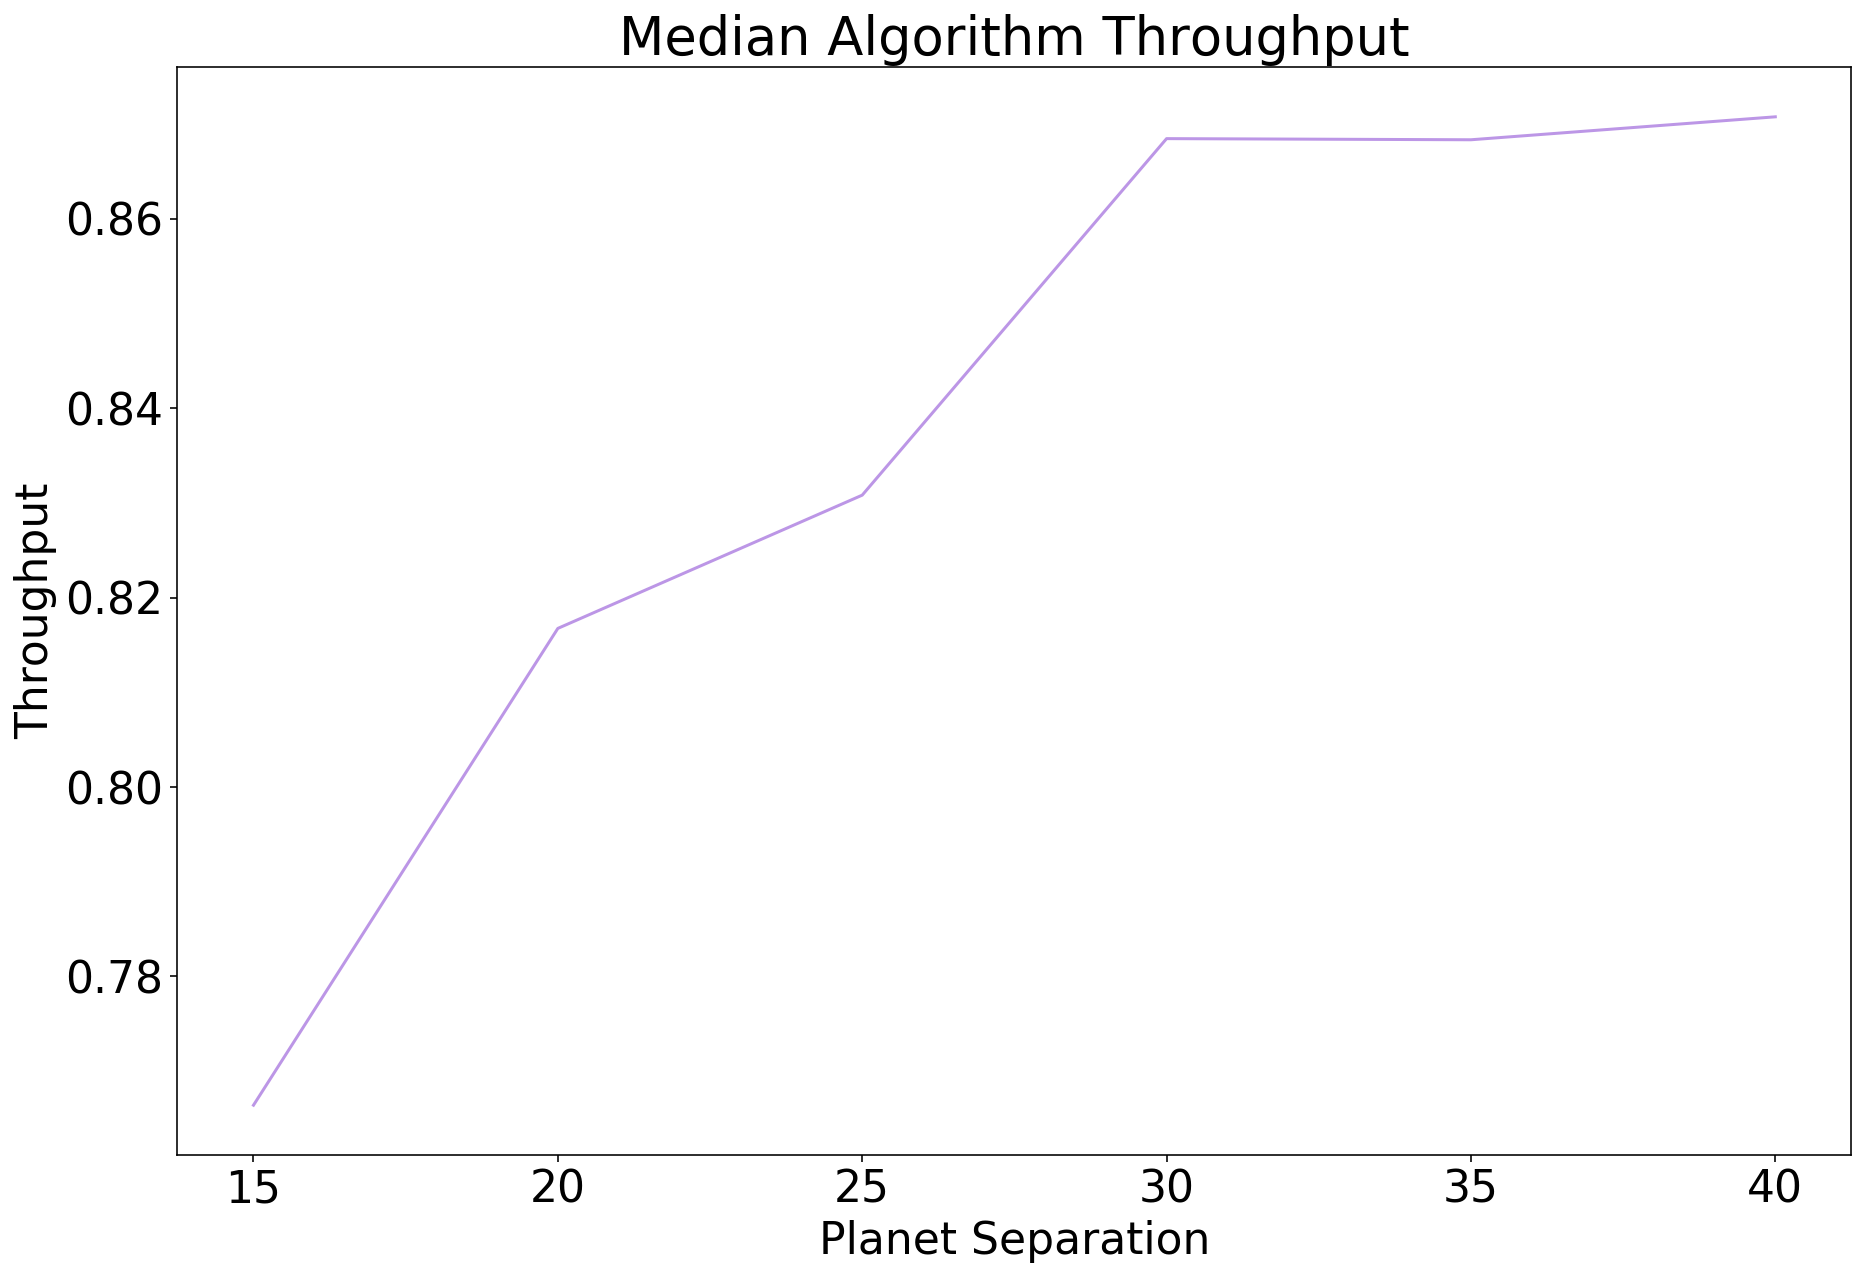

In [34]:
#Try adding more planets (2x more)
#Function
plt.figure(figsize = (15,10))
plt.plot(med_flux_by_sep["separation"], med_flux_by_sep["throughput"], color = '#BC96E6')
plt.ylabel("Throughput")
plt.xlabel("Planet Separation")
plt.title("Median Algorithm Throughput")
plt.rcParams.update({'font.size': 22})
plt.savefig("throughput_med.png")